In [494]:
#import modules 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.impute import KNNImputer

from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

# Calculate scale_pos_weight and apply it to the XGBClassifier
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model = XGBClassifier(scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)


In [495]:
#import all 7 individual datasets

All datasets are individual, aside from picnicc which is a culmination of multiple datasets

In [496]:
#picnicc dataset 1
picnicc = pd.read_csv("/Users/nabilahkathrada/Downloads/picnicc.csv")

In [497]:
#sheffield dataset 2
sheffield = pd.read_csv("/Users/nabilahkathrada/Downloads/shef_v2.csv")

In [498]:
sheffield

,study.id,melb.id,patient.id,episode.id,sex,age.days,date$date,tumour,marrow,remission,...,severe.infection,cdi,mdi,bloodstream,fever,admission,ctemp,alexander.rule,pinda.rule,ammann.rule
0,Sheffield,Sheffield.1,1,1,M,1843,12/08/2010,HGBrain,False,NaN,...,False,False,False,False,2.0,2.5,1.2,LR,NaN,NaN
1,Sheffield,Sheffield.1,1,2,M,1974,21/12/2010,HGBrain,False,NaN,...,False,False,False,False,4.0,10.0,3.0,LR,NaN,NaN
2,Sheffield,Sheffield.1,1,3,M,1930,07/11/2010,HGBrain,False,NaN,...,False,False,False,False,2.0,3.0,2.0,LR,NaN,NaN
3,Sheffield,Sheffield.1,1,4,M,1935,12/11/2010,HGBrain,False,NaN,...,False,False,False,False,2.0,3.0,1.3,LR,NaN,NaN
4,Sheffield,Sheffield.2,2,1,F,2024,18/11/2010,HR-NBL,True,NaN,...,False,True,True,True,1.0,2.0,-0.7,LR,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Sheffield,Sheffield.37,37,2,M,3601,22/07/2010,ALL,True,NaN,...,False,False,False,False,1.0,2.0,2.7,LR,HR,HR
140,Sheffield,Sheffield.37,37,3,M,3725,23/11/2010,ALL,True,NaN,...,False,True,False,False,1.0,2.0,1.3,LR,LR,LR
141,Sheffield,Sheffield.37,37,4,M,3942,28/06/2011,ALL,True,NaN,...,False,True,True,True,2.0,3.0,1.3,LR,NaN,NaN
142,Sheffield,Sheffield.37,37,5,M,4093,26/11/2011,ALL,True,NaN,...,False,False,False,False,2.0,3.0,1.9,LR,NaN,NaN


In [499]:
sheffield = sheffield.rename(columns={'date$date': 'date'})


In [500]:
#leeds dataset 3
leeds = pd.read_csv("/Users/nabilahkathrada/Downloads/leeds.csv")

In [501]:
#NHMRC dataset 4 
NHMRC = pd.read_csv("/Users/nabilahkathrada/Downloads/NHMRC (1).csv")

In [502]:
#QMC dataset 5
QMC = pd.read_csv("/Users/nabilahkathrada/Downloads/qmc.csv")

In [503]:
#MELB65O dataset 6
MELB101 = pd.read_csv("/Users/nabilahkathrada/Downloads/melb101.csv")

In [504]:
#MELB65O dataset 7 
MELB650 = pd.read_csv("/Users/nabilahkathrada/Downloads/melb650.csv")

In [505]:
#read all datasets

Check all datasets
See if they are correct/usable
Check all their headings 
-change date in sheffield above

In [506]:
picnicc
sheffield
leeds
NHMRC
QMC
MELB101
MELB650

,study.id,melb.id,record_number,episode,tumour,alt,ctemp,hb,ln.wcc,ln.amc,...,mdi,icu,d1p,hb2,ctemp2,ln.wcc2,ln.amc2,severe.unwell2,X,X.1
0,Melb650,656,756970,1,RMS,NaN,1.0,10.4,0.741937,-0.597837,...,False,False,0.035015,NaN,NaN,NaN,NaN,False,NaN,NaN
1,Melb650,796,854015,1,AML,NaN,1.4,8.1,-0.223144,-2.995732,...,False,False,0.107919,8.0,-1.8,-0.356675,-2.813411,False,NaN,NaN
2,Melb650,469,865031,1,NHL,NaN,1.3,11.2,-1.609438,-6.000000,...,False,False,0.135711,10.0,-1.2,-0.693147,-3.506558,False,NaN,NaN
3,Melb650,506,865031,2,NHL,NaN,1.0,6.7,-1.203973,-6.000000,...,False,False,0.114629,10.2,0.9,-0.916291,-5.298317,False,NaN,NaN
4,Melb650,245,874568,1,Osteo,NaN,1.4,15.7,0.000000,-2.659260,...,True,True,0.119219,10.0,-0.4,0.788457,-2.040221,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Melb650,41,1543874,1,ALL,NaN,2.1,11.0,-2.302585,-6.000000,...,False,False,0.202116,8.6,0.2,-1.609438,-5.298317,False,NaN,NaN
646,Melb650,81,1544839,1,NHL,NaN,1.2,9.2,-1.609438,-6.000000,...,False,False,0.108066,11.1,-1.9,-1.609438,-5.298317,False,NaN,NaN
647,Melb650,46,1548126,1,RMS,NaN,1.5,9.5,-1.203973,-6.000000,...,True,False,0.129848,9.2,-1.8,-1.203973,-5.298317,False,NaN,NaN
648,Melb650,95,1550411,1,Ewings,NaN,1.3,9.8,-1.203973,-6.000000,...,False,False,0.099993,9.3,-2.8,-1.609438,-5.298317,False,NaN,NaN


Combine all datasets
Use concat

In [507]:
#Combine all datasets->combined
combined = pd.concat([picnicc, sheffield, leeds, NHMRC, QMC, MELB101, MELB650], axis=0, join='outer', ignore_index=True)

Only want first episode, remove all others

In [508]:
#remove all episodes aside from 1
combined = combined[combined['episode.id'] == 1]


In [509]:
# Remove duplicates if any - not likely but incase
combined = combined.drop_duplicates()


In [510]:
#check
combined

,study.id,data.id,patient.id,episode.id,sex,age.days,date,tumour,marrow,remission,...,alt,icu,d1p,hb2,ctemp2,ln.wcc2,ln.amc2,severe.unwell2,X,X.1
0,Alexander,1.0,1.0,1.0,M,3245.0,20-12-19,NHL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alexander,3.0,2.0,1.0,F,3606.0,29-07-19,NHL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alexander,4.0,3.0,1.0,F,5823.0,2-03-19,AML,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Alexander,6.0,4.0,1.0,M,2301.0,2-07-19,ALL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Alexander,8.0,5.0,1.0,M,1996.0,2-08-19,ALL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,Sheffield,NaN,33.0,1.0,F,4818.0,30/03/2011,ALL,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5287,Sheffield,NaN,34.0,1.0,M,3840.0,15/09/2011,ALL,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5292,Sheffield,NaN,35.0,1.0,M,3218.0,17/07/2009,Osteo,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5294,Sheffield,NaN,36.0,1.0,M,1811.0,12/04/2012,ALL,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [511]:
#rejig column positions
#remove (2) columns from MELB650
combined = combined.iloc[:, :-17]


In [512]:
#check
combined

,study.id,data.id,patient.id,episode.id,sex,age.days,date,tumour,marrow,remission,...,melb.id,ln.plt,ln.wcc,ln.anc,ln.amc,ln.crp,ln.pct,ln.il6,ln.il8,ctemp
0,Alexander,1.0,1.0,1.0,M,3245.0,20-12-19,NHL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alexander,3.0,2.0,1.0,F,3606.0,29-07-19,NHL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alexander,4.0,3.0,1.0,F,5823.0,2-03-19,AML,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Alexander,6.0,4.0,1.0,M,2301.0,2-07-19,ALL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Alexander,8.0,5.0,1.0,M,1996.0,2-08-19,ALL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,Sheffield,NaN,33.0,1.0,F,4818.0,30/03/2011,ALL,True,NaN,...,Sheffield.33,3.526361,-1.714798,0.000000,2.302585,256.8,NaN,NaN,NaN,1.0
5287,Sheffield,NaN,34.0,1.0,M,3840.0,15/09/2011,ALL,True,NaN,...,Sheffield.34,3.737670,-0.223144,0.000000,2.302585,NaN,NaN,NaN,NaN,1.2
5292,Sheffield,NaN,35.0,1.0,M,3218.0,17/07/2009,Osteo,False,NaN,...,Sheffield.35,4.143135,-0.446287,2.079442,2.995732,NaN,NaN,NaN,NaN,3.0
5294,Sheffield,NaN,36.0,1.0,M,1811.0,12/04/2012,ALL,True,NaN,...,Sheffield.36,5.252273,-0.653926,3.526361,2.302585,43.8,NaN,NaN,NaN,1.0


In [513]:
#check column list
print(combined.columns.tolist())

['study.id', 'data.id', 'patient.id', 'episode.id', 'sex', 'age.days', 'date', 'tumour', 'marrow', 'remission', 'relapse', 'chemo.intensity', 'chemo.time', 'cvl', 'cvl.type', 'out.patient', 'temp', 'resp.rate', 'resp.compromise', 'pulse.rate', 'shock', 'sys', 'dia', 'mucositis', 'severe.mucositis', 'severe.unwell', 'abx', 'mod.abx', 'hb', 'plt', 'wcc', 'anc', 'amc', 'crp', 'pct', 'il6', 'il8', 'death', 'icu.duration', 'organ.support', 'severe.infection', 'cdi', 'mdi', 'bloodstream', 'fever', 'admission', 'melb.id', 'ln.plt', 'ln.wcc', 'ln.anc', 'ln.amc', 'ln.crp', 'ln.pct', 'ln.il6', 'ln.il8', 'ctemp']


check all columns 
decide what to keep

In [514]:
#final column decison
combined = combined[['study.id', 'tumour', 'temp', 'severe.unwell',  'hb', 'plt', 'wcc', 'anc', 'amc', 'death',  'severe.infection', 'cdi', 'mdi', 'bloodstream', 'fever',  ]]


In [515]:
#check
combined

,study.id,tumour,temp,severe.unwell,hb,plt,wcc,anc,amc,death,severe.infection,cdi,mdi,bloodstream,fever
0,Alexander,NHL,NaN,False,NaN,NaN,0.24,10.0,0.0,False,True,NaN,True,True,2.0
2,Alexander,NHL,NaN,False,NaN,NaN,2.20,70.0,594.0,False,False,NaN,False,False,1.0
3,Alexander,AML,NaN,False,NaN,NaN,0.23,16.0,0.0,False,False,NaN,False,False,2.0
5,Alexander,ALL,NaN,False,NaN,NaN,0.24,0.0,0.0,False,False,NaN,False,False,7.0
7,Alexander,ALL,NaN,False,NaN,NaN,0.10,0.0,0.0,False,True,NaN,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,Sheffield,ALL,38.0,False,8.0,NaN,NaN,NaN,NaN,No,False,False,True,True,17.0
5287,Sheffield,ALL,38.2,False,10.0,NaN,NaN,NaN,NaN,No,False,False,False,NaN,2.0
5292,Sheffield,Osteo,40.0,False,7.6,NaN,NaN,NaN,NaN,No,False,False,True,False,3.0
5294,Sheffield,ALL,38.0,False,9.8,NaN,NaN,NaN,NaN,No,False,False,False,False,2.0


Missingness

In [516]:
#NaN
nan_percentage = combined.isna().mean() * 100
nan_percentage_dict = nan_percentage.to_dict()

print("Percentage of NaN values in each column:")
for column, percentage in nan_percentage_dict.items():
    print(f"{column}: {percentage}%")

Percentage of NaN values in each column:
study.id: 0.0%
tumour: 0.07849293563579278%
temp: 48.8749345892203%
severe.unwell: 42.77864992150707%
hb: 50.313971742543174%
plt: 49.37205651491366%
wcc: 45.813710099424384%
anc: 9.105180533751962%
amc: 75.17006802721087%
death: 3.9769754055468343%
severe.infection: 11.119832548403977%
cdi: 13.89324960753532%
mdi: 3.636839351125065%
bloodstream: 0.3663003663003663%
fever: 73.49555206698064%


replace 
True=1
False=0

In [517]:
combined.replace({True: 1, False: 0}, inplace=True)


/var/folders/5w/vh0f8pn541j2g76k9ln2jyqh0000gn/T/ipykernel_93252/29455575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined.replace({True: 1, False: 0}, inplace=True)


In [518]:
#check
combined

,study.id,tumour,temp,severe.unwell,hb,plt,wcc,anc,amc,death,severe.infection,cdi,mdi,bloodstream,fever
0,Alexander,NHL,NaN,0.0,NaN,NaN,0.24,10.0,0.0,0,1.0,NaN,1.0,1.0,2.0
2,Alexander,NHL,NaN,0.0,NaN,NaN,2.20,70.0,594.0,0,0.0,NaN,0.0,0.0,1.0
3,Alexander,AML,NaN,0.0,NaN,NaN,0.23,16.0,0.0,0,0.0,NaN,0.0,0.0,2.0
5,Alexander,ALL,NaN,0.0,NaN,NaN,0.24,0.0,0.0,0,0.0,NaN,0.0,0.0,7.0
7,Alexander,ALL,NaN,0.0,NaN,NaN,0.10,0.0,0.0,0,1.0,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,Sheffield,ALL,38.0,0.0,8.0,NaN,NaN,NaN,NaN,No,0.0,0.0,1.0,1.0,17.0
5287,Sheffield,ALL,38.2,0.0,10.0,NaN,NaN,NaN,NaN,No,0.0,0.0,0.0,NaN,2.0
5292,Sheffield,Osteo,40.0,0.0,7.6,NaN,NaN,NaN,NaN,No,0.0,0.0,1.0,0.0,3.0
5294,Sheffield,ALL,38.0,0.0,9.8,NaN,NaN,NaN,NaN,No,0.0,0.0,0.0,0.0,2.0


??? drop study id

In [519]:
combined = combined.drop(columns=['study.id'])

In [520]:
#check
combined

,tumour,temp,severe.unwell,hb,plt,wcc,anc,amc,death,severe.infection,cdi,mdi,bloodstream,fever
0,NHL,NaN,0.0,NaN,NaN,0.24,10.0,0.0,0,1.0,NaN,1.0,1.0,2.0
2,NHL,NaN,0.0,NaN,NaN,2.20,70.0,594.0,0,0.0,NaN,0.0,0.0,1.0
3,AML,NaN,0.0,NaN,NaN,0.23,16.0,0.0,0,0.0,NaN,0.0,0.0,2.0
5,ALL,NaN,0.0,NaN,NaN,0.24,0.0,0.0,0,0.0,NaN,0.0,0.0,7.0
7,ALL,NaN,0.0,NaN,NaN,0.10,0.0,0.0,0,1.0,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,ALL,38.0,0.0,8.0,NaN,NaN,NaN,NaN,No,0.0,0.0,1.0,1.0,17.0
5287,ALL,38.2,0.0,10.0,NaN,NaN,NaN,NaN,No,0.0,0.0,0.0,NaN,2.0
5292,Osteo,40.0,0.0,7.6,NaN,NaN,NaN,NaN,No,0.0,0.0,1.0,0.0,3.0
5294,ALL,38.0,0.0,9.8,NaN,NaN,NaN,NaN,No,0.0,0.0,0.0,0.0,2.0


if death is not yes, must be no. 
make the same assumption for other features also

In [521]:
combined['death'].fillna(0, inplace=True)


In [522]:
combined['death'] = combined['death'].replace('No', '0')

In [523]:
combined['severe.infection'].fillna(0, inplace=True)


In [524]:
combined['severe.unwell'].fillna(0, inplace=True)


In [525]:
combined['bloodstream'].fillna(0, inplace=True)


In [526]:
combined['fever'].fillna(0, inplace=True)


In [527]:
combined

,tumour,temp,severe.unwell,hb,plt,wcc,anc,amc,death,severe.infection,cdi,mdi,bloodstream,fever
0,NHL,NaN,0.0,NaN,NaN,0.24,10.0,0.0,0,1.0,NaN,1.0,1.0,2.0
2,NHL,NaN,0.0,NaN,NaN,2.20,70.0,594.0,0,0.0,NaN,0.0,0.0,1.0
3,AML,NaN,0.0,NaN,NaN,0.23,16.0,0.0,0,0.0,NaN,0.0,0.0,2.0
5,ALL,NaN,0.0,NaN,NaN,0.24,0.0,0.0,0,0.0,NaN,0.0,0.0,7.0
7,ALL,NaN,0.0,NaN,NaN,0.10,0.0,0.0,0,1.0,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5286,ALL,38.0,0.0,8.0,NaN,NaN,NaN,NaN,0,0.0,0.0,1.0,1.0,17.0
5287,ALL,38.2,0.0,10.0,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2.0
5292,Osteo,40.0,0.0,7.6,NaN,NaN,NaN,NaN,0,0.0,0.0,1.0,0.0,3.0
5294,ALL,38.0,0.0,9.8,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,2.0


Will need to imput

First need to do train test split

In [528]:
combined = combined.dropna(subset=['mdi'])
combined.loc[:, 'mdi'] = combined['mdi'].astype(int)


combined = combined.copy()



In [529]:
#Y feature



X = combined[['tumour', 'temp',  'hb', 'plt', 'wcc', 'anc', 'amc']]
y = combined ['mdi']






#chnage type 
y = y.astype(int)


In [530]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Label encoding

In [531]:
#define
from sklearn.preprocessing import LabelEncoder

label_encoder_tumour = LabelEncoder()


#apply encoding/encoder
X_train['tumour'] = label_encoder_tumour.fit_transform(X_train['tumour'])
X_test['tumour'] = label_encoder_tumour.transform(X_test['tumour'])





KNN imputation n=1

In [532]:
imputer = KNNImputer(n_neighbors=1)

#fit and transform imputer- on training set
X_train_imputed = imputer.fit_transform(X_train)

#transform test set using ^ fitted imputer
X_test_imputed = imputer.transform(X_test)


#make consistent to pandas df
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [533]:
#check
print(X_train.head())
print(X_test.head())

   tumour       temp   hb    plt   wcc     anc   amc
0     0.0  38.900000  9.3  152.0  1.10   0.000  22.0
1     0.0  39.000000  9.0   70.0  0.73   0.000   5.5
2     0.0  38.100000  6.6   47.0  1.00   0.200  91.0
3     6.0  39.400000  6.3   13.0  0.20   0.459  40.0
4    19.0  39.599998  7.6   28.0  0.40  10.000  10.0
   tumour  temp    hb   plt   wcc   anc   amc
0     1.0  38.5   8.5  58.0  0.30  0.00   0.0
1     0.0  39.4  10.5  43.0  0.40  0.00   0.0
2     0.0  37.4   8.2  22.0  0.38  9.00   0.0
3     0.0  38.1   6.6  54.0  0.24  0.30  91.0
4    17.0  39.1   8.0  94.0  0.20  0.05   0.0


In [534]:
X_train = X_train.astype(int)  
X_test = X_test.astype(int) 

In [535]:
#check m
print(X_train.isnull().sum())
print(X_test.isnull().sum())

tumour    0
temp      0
hb        0
plt       0
wcc       0
anc       0
amc       0
dtype: int64
tumour    0
temp      0
hb        0
plt       0
wcc       0
anc       0
amc       0
dtype: int64


In [536]:
X_train


,tumour,temp,hb,plt,wcc,anc,amc
0,0,38,9,152,1,0,22
1,0,39,9,70,0,0,5
2,0,38,6,47,1,0,91
3,6,39,6,13,0,0,40
4,19,39,7,28,0,10,10
...,...,...,...,...,...,...,...
2941,1,39,7,17,2,1,5
2942,13,38,7,64,0,0,21
2943,1,38,8,48,0,0,0
2944,15,38,8,116,0,0,145


In [537]:
X_test

,tumour,temp,hb,plt,wcc,anc,amc
0,1,38,8,58,0,0,0
1,0,39,10,43,0,0,0
2,0,37,8,22,0,9,0
3,0,38,6,54,0,0,91
4,17,39,8,94,0,0,0
...,...,...,...,...,...,...,...
732,20,38,9,11,0,0,12
733,1,39,8,127,0,0,0
734,7,36,13,69,0,0,99
735,0,38,11,170,1,43,31


Key for tumour
{'ALL': 0, 'AML': 1, 'Brain': 2, 'Carcinoma': 3, 'Ewings': 4, 'GCT': 5, 'HGBrain': 6, 'HR-NBL': 7, 'Hepato': 8, 'Hodgkins': 9, 'LCH': 10, 'LGBrain': 11, 'LR-NBL': 12, 'Lymphoma': 13, 'NBL': 14, 'NHL': 15, 'Nonmalignant': 16, 'Osteo': 17, 'Other': 18, 'RMS': 19, 'Retino': 20, 'Sarcoma': 21, 'Solid': 22, 'Wilms': 23, nan: 24}


reverse_tumour_mapping = {v: k for k, v in enumerate(label_encoder_tumour.classes_)}

print(reverse_tumour_mapping)

Y-distribusion 

In [538]:
#Y train distribution
print("y_train distribution:\n", y_train.value_counts())


y_train distribution:
 mdi
0.0    2142
1.0     804
Name: count, dtype: int64


checking the shape/distribution

In [539]:
print("X_train head:\n", X_train.head())
print("y_train head:\n", y_train.head())


X_train head:
    tumour  temp  hb  plt  wcc  anc  amc
0       0    38   9  152    1    0   22
1       0    39   9   70    0    0    5
2       0    38   6   47    1    0   91
3       6    39   6   13    0    0   40
4      19    39   7   28    0   10   10
y_train head:
 2156    0.0
803     0.0
3277    0.0
1405    0.0
2417    1.0
Name: mdi, dtype: float64


In [540]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (2946, 7)
y_train shape: (2946,)


In [541]:
print("X_train description:\n", X_train.describe())


X_train description:
             tumour         temp           hb          plt          wcc  \
count  2946.000000  2946.000000  2946.000000  2946.000000  2946.000000   
mean      6.408350    38.231500     8.299389    68.844874     0.512559   
std       7.817871     0.667997     1.928778    73.380193     4.421511   
min       0.000000    35.000000     3.000000     0.000000     0.000000   
25%       0.000000    38.000000     7.000000    20.000000     0.000000   
50%       1.000000    38.000000     8.000000    54.000000     0.000000   
75%      14.000000    39.000000     9.000000    85.000000     0.000000   
max      24.000000    41.000000    16.000000   999.000000   186.000000   

               anc          amc  
count  2946.000000  2946.000000  
mean     40.265784    76.080448  
std     260.447927   247.975716  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000    20.000000  
75%       0.000000    91.000000  
max    8390.000000  3672.000000  


In [542]:
print("X_train data types:\n", X_train.dtypes)


X_train data types:
 tumour    int64
temp      int64
hb        int64
plt       int64
wcc       int64
anc       int64
amc       int64
dtype: object


In [543]:
#confirm no missing values
print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in y_train:\n", y_train.isnull().sum())

Missing values in X_train:
 tumour    0
temp      0
hb        0
plt       0
wcc       0
anc       0
amc       0
dtype: int64
Missing values in y_train:
 0


SMOTE


In [544]:
#original
print("y_train distribution:\n", y_train.value_counts())


y_train distribution:
 mdi
0.0    2142
1.0     804
Name: count, dtype: int64


In [545]:
#smote
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

SMOTE y_train distribution:
 mdi
0.0    2142
1.0    2142
Name: count, dtype: int64


In [547]:
#checks post smote
print("Shape of X_train_smote:", X_train_smote.shape)
print("Shape of y_train_smote:", y_train_smote.shape)


Shape of X_train_smote: (4284, 7)
Shape of y_train_smote: (4284,)


In [548]:
print("X_train_smote head:\n", X_train_smote.head())
print("y_train_smote head:\n", y_train_smote.head())

X_train_smote head:
    tumour  temp  hb  plt  wcc  anc  amc
0       0    38   9  152    1    0   22
1       0    39   9   70    0    0    5
2       0    38   6   47    1    0   91
3       6    39   6   13    0    0   40
4      19    39   7   28    0   10   10
y_train_smote head:
 0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: mdi, dtype: float64


In [549]:
print("X_train_smote describe:\n", X_train_smote.describe())
print("y_train_smote distribution:\n", y_train_smote.value_counts())

X_train_smote describe:
             tumour         temp           hb          plt          wcc  \
count  4284.000000  4284.000000  4284.000000  4284.000000  4284.000000   
mean      6.110411    38.218721     8.211251    67.204015     0.407330   
std       7.671074     0.623319     1.811308    72.469633     3.752693   
min       0.000000    35.000000     3.000000     0.000000     0.000000   
25%       0.000000    38.000000     7.000000    18.000000     0.000000   
50%       1.000000    38.000000     8.000000    54.000000     0.000000   
75%      14.000000    38.000000     9.000000    83.000000     0.000000   
max      24.000000    41.000000    16.000000   999.000000   186.000000   

               anc          amc  
count  4284.000000  4284.000000  
mean     33.125817    69.771242  
std     220.408067   232.385603  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000    16.000000  
75%       0.000000    91.000000  
max    8390.000000  3672.000000  
y_

plots to show features-histogram

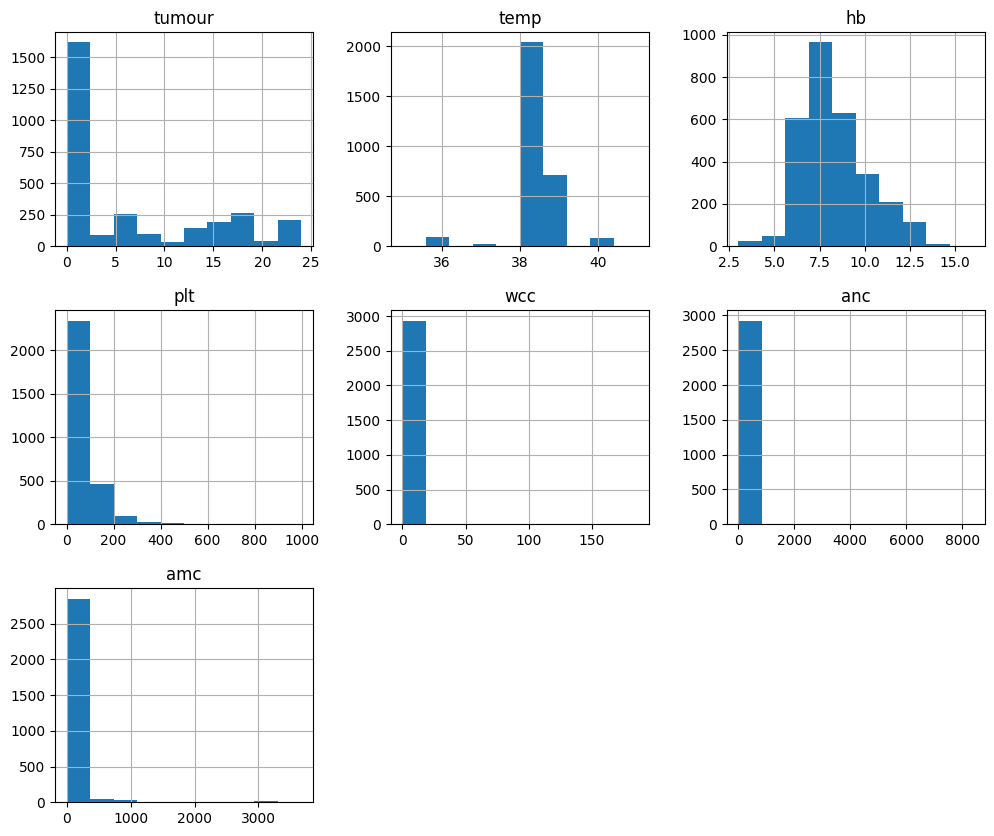

In [550]:
# feature histogram
X_train.hist(figsize=(12, 10))
plt.show()


plot to show Y - visual

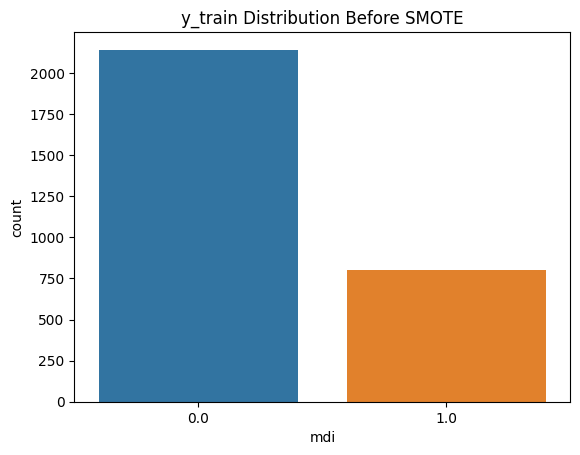

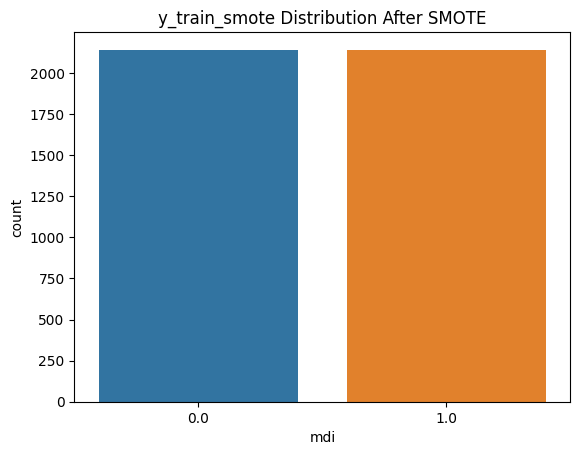

In [551]:
sns.countplot(x=y_train)
plt.show()

sns.countplot(x=y_train_smote)
plt.show()


XGB

class weights

In [552]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))


In [553]:
scale_pos_weight = class_weights_dict.get(0, 1) / class_weights_dict.get(1, 1)


In [554]:
scale_pos_weight

0.3753501400560224

In [555]:
model = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
model.fit(X_train_smote, y_train_smote)

# Calculate scale_pos_weight and apply it to the XGBClassifier
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model = XGBClassifier(scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [556]:
y_pred = model.predict(X_test)


In [557]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7042062415196744
Confusion Matrix:
 [[476  60]
 [158  43]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.89      0.81       536
         1.0       0.42      0.21      0.28       201

    accuracy                           0.70       737
   macro avg       0.58      0.55      0.55       737
weighted avg       0.66      0.70      0.67       737



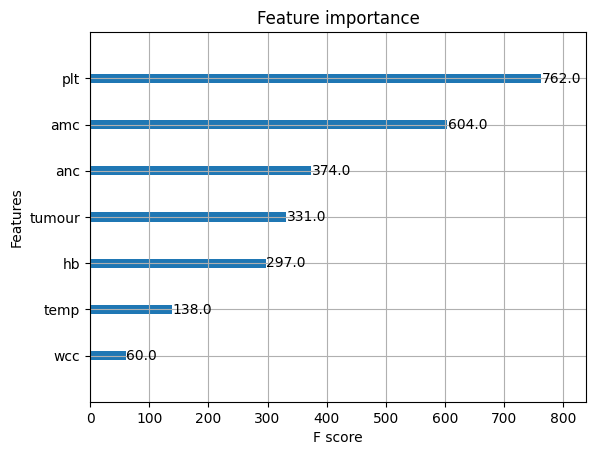

In [558]:
# feature importance->visual
xgb.plot_importance(model)
plt.show()

#cross validattion

In [559]:

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.71186441 0.73005093 0.72835314 0.71646859 0.71816638]
Mean Cross-Validation Accuracy: 0.7209806912031308


grid search

In [573]:
# Define parameter grid
param_grid = {
    'n_estimators': [300, 400, 500, 1000],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# gridsearch
grid_search = GridSearchCV(estimator=XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='recall',
                           n_jobs=-1,
                           verbose=2)

# Fit gridsearch
grid_search.fit(X_train_smote, y_train_smote)

# parameters
print("Best parameters found: ", grid_search.best_params_)

# estimator 
best_model = grid_search.best_estimator_




# Calculate scale_pos_weight and apply it to the XGBClassifier
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model = XGBClassifier(scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END

In [577]:
#^evaluate on test set
y_pred_best = best_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Accuracy Score: 0.6743554952510177
Confusion Matrix:
 [[438  98]
 [142  59]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.82      0.78       536
         1.0       0.38      0.29      0.33       201

    accuracy                           0.67       737
   macro avg       0.57      0.56      0.56       737
weighted avg       0.65      0.67      0.66       737



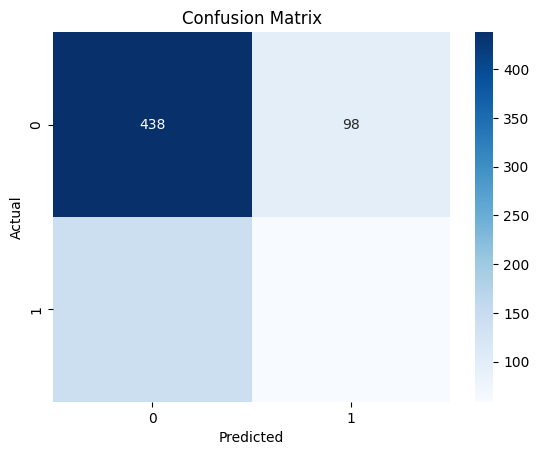

In [576]:
#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [570]:

# ROC AUC Score
from sklearn.metrics import roc_auc_score
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc) 




ROC AUC Score: 0.5758381599465361


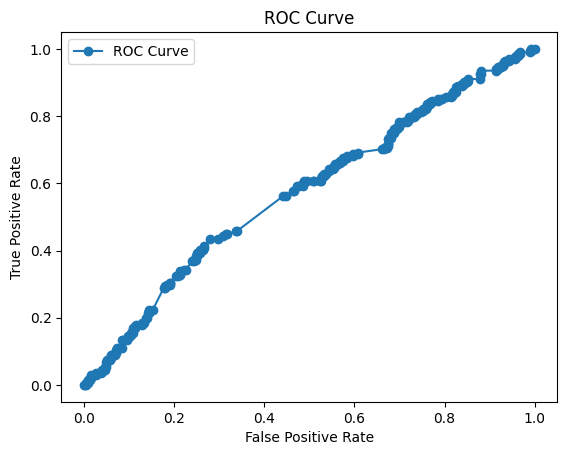

In [571]:
#ROC curve 
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, marker='o', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


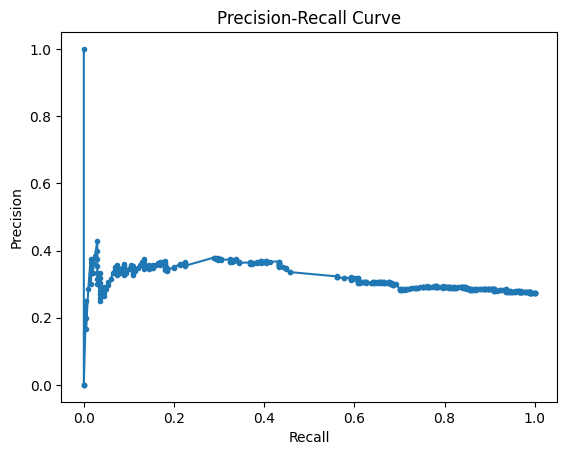

In [572]:
#precision recall curve 
from sklearn.metrics import precision_recall_curve

y_pred_prob = best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
